In [1]:
import pandas as pd
import jieba
import re 

In [2]:
post = pd.read_csv('SexWeibo.csv')
comment = pd.read_csv('SexComment.csv')

In [3]:
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r').readlines()]
    return stopwords
stopwords = stopwordslist('stop_words.txt')  

In [15]:
post.head()

,weibo_id,weibo_text,keyword,user_gender,user_location,user_following,user_follower,weibo_like,weibo_repost,weibo_comment,weibo_date
0,J1zF7smOR,这两天，看到首页的几个大咖在讨论“田园女权”，讲真，我不清楚什么是田园女权以前听过，但没深入...,女权,女,广东,1737,1712050,989.0,62.0,115.0,12/05/2020 13:42
1,GvXf0ymdJ,【好莱坞女星性侵17岁男星，付38万美元封口费，曾举报哈维·韦恩斯坦性侵】《纽约时报》8月1...,NaN,女,北京,343,4314049,539.0,69.0,158.0,23/08/2018 12:40
2,J2XeR8rPn,“姨味” 怎么讲，挺恶意满满的一个词。形容一个男性“姨”，背后仍然是一种不被察觉的性别歧视和...,厌女,女,浙江,598,850691,255.0,11.0,37.0,21/05/2020 15:33
3,IxpfTCMAo,控评就没意思了，你们讨厌木大妈不允许有任何不同意见，但事实上我也觉得你们很无聊，针对她哪里不...,"厌女,女权",女,其他,295,4196,1197.0,71.0,100.0,06/03/2020 23:18
4,J4B0Mps5Q,白人警察可以和黑人兄弟一起携手抗议，但很难想象女权运动时任何肤色的男性会如此这般站在女性这边...,女权,女,其他,427,17319,2121.0,624.0,67.0,01/06/2020 10:39


In [16]:
comment.head()

,index,weibo_id,comment_text,gender,location,like,date,label,category,target
0,0,J1zF7smOR,她们不结婚不要孩子，却觉得我们这种结婚有孩子的是婚驴,女,广东,14,12/05/2020 15:04,1,SCB,G
1,1,GvXf0ymdJ,妈的什么时候有人来性侵我一下啊 不要封口费的那种,男,其他,36,23/08/2018 13:10,1,SO,I
2,2,J2XeR8rPn,我觉得这就是对一类人所有的特点进行形容吧，“爹味”也是贬义词，为什么不觉得有性别歧视意味呢？,女,浙江,0,21/05/2020 16:12,1,MA,G
3,3,IxpfTCMAo,姐姐你不要急，关注久的都知道她骂的一切归根结底都是渴婚的，她并不骂学艺术的，她骂的是不肯像培...,女,江苏,1,31/03/2020 13:57,1,MA,I
4,4,J4B0Mps5Q,"给他们争取权利的不是女权是腐女，你该不会说腐女都女权吧？连女同性恋都不是全部女权，腐女？,男...",女,其他,0,##########,1,MA,G


In [18]:
post_sub = post[['weibo_id','weibo_text','user_gender','user_location']]
post_sub.columns = ['id','text','gender','location']
comment_sub = comment[['weibo_id','comment_text','gender','location']]
comment_sub.columns = ['id','text','gender','location']
frames = [post_sub, comment_sub]
alltext = pd.concat(frames)
alltext = pd.concat(frames, keys=['post','comment'])

In [19]:
alltext.head()

id                                               text gender  \
post 0  J1zF7smOR  这两天，看到首页的几个大咖在讨论“田园女权”，讲真，我不清楚什么是田园女权以前听过，但没深入...      女   
     1  GvXf0ymdJ  【好莱坞女星性侵17岁男星，付38万美元封口费，曾举报哈维·韦恩斯坦性侵】《纽约时报》8月1...      女   
     2  J2XeR8rPn  “姨味” 怎么讲，挺恶意满满的一个词。形容一个男性“姨”，背后仍然是一种不被察觉的性别歧视和...      女   
     3  IxpfTCMAo  控评就没意思了，你们讨厌木大妈不允许有任何不同意见，但事实上我也觉得你们很无聊，针对她哪里不...      女   
     4  J4B0Mps5Q  白人警察可以和黑人兄弟一起携手抗议，但很难想象女权运动时任何肤色的男性会如此这般站在女性这边...      女   

       location  
post 0       广东  
     1       北京  
     2       浙江  
     3       其他  
     4       其他

## Word divergence

In [12]:
import pkuseg

seg = pkuseg.pkuseg(model_name= 'web') 
seg = pkuseg.pkuseg(user_dict='dict.txt') 
comment['cut'] = comment['comment_text'].apply(lambda x: [i for i in seg.cut(x) if i not in stopwords and len(i) > 1])
comment.head()

,index,weibo_id,comment_text,gender,location,like,date,label,category,target,cut
0,0,J1zF7smOR,她们不结婚不要孩子，却觉得我们这种结婚有孩子的是婚驴,女,广东,14,12/05/2020 15:04,1,SCB,G,"[结婚, 孩子, 结婚, 孩子, 婚驴]"
1,1,GvXf0ymdJ,妈的什么时候有人来性侵我一下啊 不要封口费的那种,男,其他,36,23/08/2018 13:10,1,SO,I,"[妈的, 有人, 性侵, 封口费, 那种]"
2,2,J2XeR8rPn,我觉得这就是对一类人所有的特点进行形容吧，“爹味”也是贬义词，为什么不觉得有性别歧视意味呢？,女,浙江,0,21/05/2020 16:12,1,MA,G,"[这就, 一类, 形容, 爹味, 贬义词, 性别, 歧视, 意味]"
3,3,IxpfTCMAo,姐姐你不要急，关注久的都知道她骂的一切归根结底都是渴婚的，她并不骂学艺术的，她骂的是不肯像培...,女,江苏,1,31/03/2020 13:57,1,MA,I,"[姐姐, 关注, 渴婚, 骂学, 艺术, 培养, 儿子, 培养, 女儿, 女儿学, 跳舞, ..."
4,4,J4B0Mps5Q,"给他们争取权利的不是女权是腐女，你该不会说腐女都女权吧？连女同性恋都不是全部女权，腐女？,男...",女,其他,0,##########,1,MA,G,"[权利, 女权, 腐女, 腐女, 女权, 同性恋, 女权, 腐女, 同性恋, 同性恋, 眼里..."


In [13]:
texts_non = comment[comment['label']==0]['comment_text'].tolist()
texts_sex = comment[comment['label']==1]['comment_text'].tolist()

In [14]:
import collections
def clean_text(docs):
    text = "".join(docs)
    text = "".join(re.findall("[\u4e00-\u9fa5]+", text))
    words = seg.cut(text)
    words = [w for w in words if w not in stopwords and len(w) > 1]
    wordfreq_dict = collections.Counter(words)
    return wordfreq_dict

In [17]:
freq_non = clean_text(texts_non)
freq_sex = clean_text(texts_sex)

/Users/wangyiwei/shifterator/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


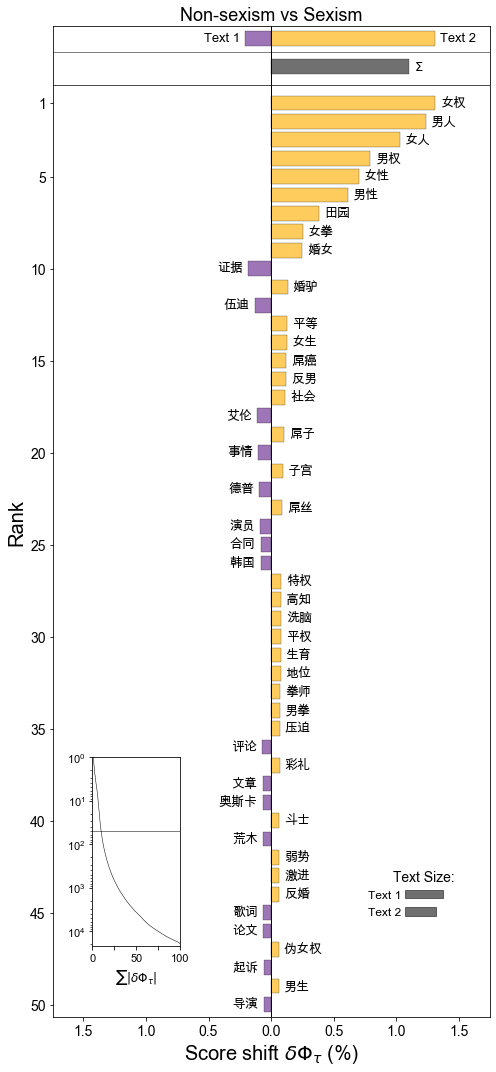

<AxesSubplot:title={'center':'Non-sexism vs Sexism'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [19]:
import shifterator as sh
jsd_shift = sh.JSDivergenceShift(type2freq_1=freq_non,
                                 type2freq_2=freq_sex,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(title='Non-sexism vs Sexism')

In [44]:
jsd_shift.get_shift_scores(details=False)

{'器官性': 3.690991892988996e-05,
 '富农': 8.916417357197278e-05,
 '那定': 3.690991892988996e-05,
 '骂婚驴': 3.690991892988996e-05,
 '主妇': 9.04255976413379e-06,
 '装傻': 3.690991892988996e-05,
 '消费观': 2.9721391190657713e-05,
 '烧到': 2.9721391190657713e-05,
 '感片': 2.9721391190657713e-05,
 '写作': 5.944278238131515e-05,
 '引导性': 2.9721391190657713e-05,
 '智识': 2.9721391190657713e-05,
 '粉龄': 2.9721391190657713e-05,
 '变味儿': 7.381983785978026e-05,
 '比如杠': 3.690991892988996e-05,
 '塔吊': 3.690991892988996e-05,
 '大方': 2.7981295884459175e-05,
 '法人': 2.9721391190657713e-05,
 '同类': 2.8026037427881602e-06,
 '离谱': 5.197485361809118e-05,
 '祖安语': 2.9721391190657713e-05,
 '马克斯韦伯': 2.9721391190657713e-05,
 '生子': 0.0001810375366329815,
 '清澈': 2.9721391190657713e-05,
 '帝国': 0.00017832834714394578,
 '大开眼界': 1.399064794222964e-05,
 '情不自禁': 2.9721391190657713e-05,
 '春满园艾梅伯': 2.9721391190657713e-05,
 '鹿晗': 2.9721391190657713e-05,
 '用工': 3.690991892988996e-05,
 '戏凤': 2.9721391190657713e-05,
 '所想': 7.381983785978026e-05,
 '传递者'

In [20]:
jsd_shift.type2p_1

{'有人': 0.0018928555707179646,
 '解释': 0.000865724640871007,
 '婚改': 1.4673298997813679e-05,
 '证明': 0.001144517321829467,
 '妻子': 0.00019075288697157782,
 '当作': 0.00019075288697157782,
 '自家人': 1.4673298997813679e-05,
 '中国人': 0.000410852371938783,
 '结婚': 0.003140085985532127,
 '家人': 0.0003374858769497146,
 '已婚': 0.00017607958797376415,
 '女性': 0.012428284251148185,
 '婚驴': 0.00016140628897595046,
 '反性': 1.4673298997813679e-05,
 '骚扰': 0.0007923581458819386,
 '口号': 0.00022009948496720517,
 '母权': 8.803979398688208e-05,
 '社会': 0.004974248360258837,
 '母亲': 0.0011591906208272807,
 '中心': 0.00019075288697157782,
 '权力': 0.0006309518569059882,
 '宰制': 1.4673298997813679e-05,
 '体系': 0.00023477278396501886,
 '女尊': 4.401989699344104e-05,
 '男卑': 2.9346597995627357e-05,
 '男朋友': 0.0003374858769497146,
 '男权主义': 4.401989699344104e-05,
 '反对': 0.0013352702088010448,
 '理解': 0.002597173922613021,
 '我俩': 1.4673298997813679e-05,
 '角度': 0.000865724640871007,
 '转换': 1.4673298997813679e-05,
 '事情': 0.0032721456765124504,

In [21]:
jsd_shift.type2p_2

{'结婚': 0.004701337512300011,
 '孩子': 0.008965341302525602,
 '婚驴妈': 1.8222238419767486e-05,
 '有人': 0.0015124457888407012,
 '性侵': 0.0009475563978279092,
 '封口费': 3.644447683953497e-05,
 '那种': 0.0012755566893837239,
 '这就': 0.0011115565436058165,
 '一类': 0.0001093334305186049,
 '形容': 0.0003280002915558147,
 '爹味': 0.0002915558147162798,
 '贬义词': 0.00027333357629651225,
 '性别': 0.0041182258828674516,
 '歧视': 0.0026604468092860526,
 '意味': 9.111119209883742e-05,
 '姐姐': 0.00038266700681511716,
 '急关': 1.8222238419767486e-05,
 '注久': 1.8222238419767486e-05,
 '渴婚': 0.0002368890994569773,
 '骂学': 1.8222238419767486e-05,
 '艺术': 0.00020044462261744234,
 '培养': 0.0002368890994569773,
 '儿子': 0.0008017784904697694,
 '女儿': 0.001384890119902329,
 '女儿学': 1.8222238419767486e-05,
 '跳舞': 3.644447683953497e-05,
 '弹琴': 1.8222238419767486e-05,
 '加码': 3.644447683953497e-05,
 '价钱': 3.644447683953497e-05,
 '目的性': 3.644447683953497e-05,
 '恶心': 0.0015124457888407012,
 '目的': 0.000528444914173257,
 '想法': 0.0008382229673093043,


# Province Top 30

In [7]:
import csv
from collections import defaultdict
import heapq
import json

In [26]:
with open('geo_zh_en_dict.json') as f:
    locations = json.load(f)

In [34]:
count_dict = dict()
with open ('SexComment.csv', newline='') as f:
    reader = csv.DictReader(f,delimiter = ',')
    for row in reader:
        if locations[row['location']] not in count_dict:
            count_dict[locations[row['location']]] = defaultdict(int)  
        word_list = seg.cut(row['comment_text'])
        word_list = [w for w in word_list if w not in stopwords and len(w) > 1]
        for word in word_list:
            count_dict[locations[row['location']]][word] += 1
        
largest_dict = dict()
for region, region_dict in count_dict.items():
    heap = [(-value, key) for key, value in region_dict.items()]
    largest = heapq.nsmallest(30, heap)
    region_largest_dict = dict()
    for item in largest:
        region_largest_dict[item[1]] = -item[0]
    largest_dict[region] = region_largest_dict
            

In [35]:
print(largest_dict)

{'Guangdong': {'女权': 171, '女性': 153, '孩子': 91, '男人': 73, '男性': 71, '女人': 66, '微博': 59, '社会': 53, '结婚': 47, '家庭': 37, '男女': 36, '中国': 35, '评论': 33, '男权': 32, '支持': 30, '这是': 30, '喜欢': 29, '婚姻': 29, '权利': 29, '平等': 28, '田园': 27, '生活': 26, '确实': 26, '关系': 25, '感觉': 25, '事情': 23, '观点': 23, '女生': 22, '工作': 21, '平权': 21}, 'Others': {'女权': 822, '女性': 624, '女人': 355, '男人': 340, '孩子': 309, '男性': 286, '社会': 202, '男权': 174, '微博': 146, '田园': 129, '喜欢': 128, '男女': 126, '性别': 124, '平等': 118, '结婚': 115, '中国': 109, '女生': 102, '权利': 101, '这是': 101, '理解': 96, '支持': 94, '粉丝': 93, '评论': 90, '事情': 83, '东西': 81, '女拳': 80, '感觉': 80, '歧视': 78, '婚姻': 77, '希望': 77}, 'Zhejiang': {'女性': 83, '女权': 64, '男性': 33, '男人': 29, '社会': 29, '孩子': 28, '性别': 25, '男女': 22, '平等': 20, '微博': 19, '运动': 19, '中国': 18, '女人': 18, '一点': 17, '理解': 16, '男权': 16, '评论': 15, '选择': 15, '平权': 14, '有人': 14, '证明': 14, '婚姻': 13, '感觉': 13, '女生': 12, '矛盾': 12, '网警': 12, '关系': 11, '对立': 11, '工作': 11, '希望': 11}, 'Jiangsu': {'女性': 109, '女权': 101, '孩子